# Máster Universitario en Inteligencia Artificial

## Matemáticas para la IA

02MIAR - 6 ECTS

### Actividad Grupal: Álgebra y Cálculo en Python  

Grupo_17:  Isaias Antonio López Salazar
           Iván Darío Callejas Sandoval

https://github.com/scanavi31/03MIAR---Matematicas--para--la--IA

# Punto 1:

Ilustrar las diferentes alternativas que pueden existir para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada variante en términos del coste computacional del mismo. En este caso en particular, y a modo de ilustración, nos centraremos en el cálculo del determinante de una matriz.

**a) [1 punto] Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.**

**RTA**

*Para el cálculo de determinantes de matrices de cualquier orden, existe una regla recursiva (teorema de Laplace) que reduce el cálculo a sumas y restas de varios determinantes de un orden inferior. Este proceso se puede repetir tantas veces como sea necesario hasta reducir el problema al cálculo de múltiples determinantes de orden tan pequeño como se quiera. Sabiendo que el determinante de un escalar es el propio escalar, es posible calcular el determinante de cualquier matriz aplicando dicho teorema.*

*Referencia: https://sites.google.com/site/grupomatematicasmineria/determinante-de-una-matriz* 

In [123]:
def determinante_recursivo(matriz):
    det = 0
    l = len(matriz)
    if l == 1:
        det = matriz[0][0]
    elif l == 2:
        det = matriz[0][0]*matriz[1][1] - matriz[0][1]*matriz[1][0]
    else:
        for i in range(l):
            matriz_reducida = []
            for j in range(1, l):
                fila = []
                for k in range(l):
                    if k != i:
                        fila.append(matriz[j][k])
                matriz_reducida.append(fila)
            det += (-1)**i * matriz[0][i] * determinante_recursivo(matriz_reducida)
    return det

Ejemplo uso función determinante_recursivo:

In [124]:
A = [[2,3,0],
     [1,3,4],
     [1,2,1]]

B = [[5,0,-1],
     [1,-3,-2],
     [0,5,3]]

print("Determinante Matriz A: ", determinante_recursivo(A))
print("Determinante Matriz B: ", determinante_recursivo(B))

Determinante Matriz A:  -1
Determinante Matriz B:  0


**b) [0.5 puntos] Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.**

**RTA**

En contexto para responder a continuación se muestra la matriz triangular superior la cual contiene entradas nulas por debajo y la matriz triangular inferior la cual contiene entradas nulas por encima: 

Matriz A (triangula superior), 

1    2    3

0    4    5

0    0    6

Matriz B (triangula inferior),

6    0    0

4    5    0

1    2    3

En cuanto a la pregunta, si existe una manera directa y sencilla para calcular el determinante de este tipo de matrices gracias a su característica de contar con entradas nulas (0) ya sea por encima o por debajo de la diagonal. Esto permite reducir los cálculos, ya que, al realizar la expansión del determinante por fila o columna se evidencia que los únicos términos que quedan son los de la diagonal principal los demás se anulan por la multiplicación por cero (0) como se demuestra con el siguiente ejemplo: 

![alt text](./demostracion.png)

Por ello, si se tiene una matriz nxn y es una matriz triangular el cálculo de su determinante se realiza de manera directa multiplicando los elementos de su diagonal principal.

                                            det⁡(A)=a_11*a_22*a_33…*a_nn

*Ejemplo / Demostración*
- Uso método recursivo 

In [125]:
Triang_superior = [[1,2,3],
                   [0,4,5],
                   [0,0,6]]

Triang_inferior = [[6,0,0],
                   [4,5,0],
                   [1,2,3]]

print("Determinante Matriz Triangular superior", determinante_recursivo(Triang_superior))
print("Determinante Matriz Triangular inferior", determinante_recursivo(Triang_inferior))

Determinante Matriz Triangular superior 24
Determinante Matriz Triangular inferior 90


- Uso método directo y sencillo 

In [126]:
def det_triang(A):
    det = 1
    l = len(A)
    for i in range(l):
        det *=  A[i][i]
    return det
    

In [127]:
print("Determinante Matriz Triangular superior", det_triang(Triang_superior))
print("Determinante Matriz Triangular inferior", det_triang(Triang_inferior))

Determinante Matriz Triangular superior 24
Determinante Matriz Triangular inferior 90


**c) [0.5 puntos] Determínese de forma justificada cómo alteran el determinante de una matriz n × n las dos operaciones elementales siguientes**:

- **Intercambiar una fila (o columna) por otra fila (o columna).**
- **Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.**

**RTA**

A contnuación, se menciona como se altera el determinante al aplicar las siguiente dos operaciones elementales:

1.	Intercambiar una fila (o columna) por otra fila (o columna): 

![alt text](./intercambiarfilas.jpeg)

de acuerdo con las propiedades de los determinantes, esta operación cambia el signo del determinante, pero no su valor absoluto. Esto se debe a que todos los elementos cambian de índice en la permutación como se justifica con la demostración realizada.

2.	Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α:  

![alt text](./sumarfila.png)

Al realizar esta operación, el valor del determinante no cambia es el mismo como se justifica con la demostración realizada.



*Ejemplo / Demostración*
- Intercambiar una fila por otra fila: 

In [128]:
# función intercambiar fila 
def intercambiar_f(matriz, i, j):
    matriz[i], matriz[j] = matriz[j], matriz[i]
    return matriz

# función intercambiar columna
def intercambiar_c(matriz, i, j):
    for fila in matriz:
        fila[i], fila[j] = fila[j], fila[i]
    return matriz

In [129]:
A = [[2,3,0],
     [1,3,4],
     [1,2,1]]
# se calcula el determinante
print("Determinante Matriz A: ", determinante_recursivo(A))
# Se intercambia la fila 1 con la fila 3
A1 = intercambiar_f(A, 0, 2)
# se calcula el determinante
print("Determinante Matriz A1: ", determinante_recursivo(A1))
print("\n")
print("Se observa como el determinante tiene el mismo valor pero cambia el signo al intercambiar una fila o (columna) por otra fila o (columna)")

Determinante Matriz A:  -1
Determinante Matriz A1:  1


Se observa como el determinante tiene el mismo valor pero cambia el signo al intercambiar una fila o (columna) por otra fila o (columna)


- Sumar a una fila otra fila multiplicada por un escalar α:

In [130]:
A = [[2,3,0],
     [1,3,4],
     [1,2,1]]
# Se suma la fila 1 multiplicada por 3 a la fila 3, αf1 = 3[2,3,0] = [6,9,0] 
A1 = [[2,3,0],
     [1,3,4],
     [7,11,1]]
# se calcula el determinante
print("Determinante Matriz A: ", determinante_recursivo(A))
print("Determinante Matriz A1: ", determinante_recursivo(A1))
print("\n")
print("Se observa como el determinante tiene el mismo valor no varía al sumar una fila (o columna) multiplicada por un α a otra fila (o columna)")

Determinante Matriz A:  -1
Determinante Matriz A1:  -1


Se observa como el determinante tiene el mismo valor no varía al sumar una fila (o columna) multiplicada por un α a otra fila (o columna)


**d) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e implementalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.**
- **Intercambiar una fila (o columna) por otra fila (o columna).**
- **Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.**

**RTA**

*Método de eliminación de Gauss con pivote parcial*

*La aparición de un pivote pequeño puede ser el anuncio de un desastre computacional. Por ello debemos modificar el método de eliminación de Gauss para evitar pivotes pequeños intercambiando las filas y las columnas de la matriz A.
Teniendo así Eliminación de Gauss con pivote parcial, esta técnica consiste en ubicar en la fila pivote el termino de mayor magnitud de tal forma que al realizar la división por dicho termino no se incurre en la violación de división por números cercanos a cero ni la división por cero.*

*Para realizar este método se tiene el siguiente procedimiento:*
- *Se debe construir una matriz de coeficientes y el vector con los términos independientes, correspondientes al sistema, y se crea una matriz llamada la matriz aumentada*
- *Se busca el número mayor (en valor absoluto) en cada la columna correspondiente a la etapa y se procede a un cambio de filas para ubicar el mayor elegido en la posición correspondiente a la etapa.*
- *Una vez ubicado el número mayor, se procede al cálculo de los multiplicadores correspondientes a la etapa.*
- *Con los multiplicadores hallados en cada etapa, se procede al cálculo de las nuevas filas de la matriz aumentada.*
- *Una vez se tiene la matriz aumentada en la forma triangular superior, se procede a realizar una sustitución regresiva, para el cálculo de las variables. Este método consiste en despejar las variables desconocidas a partir de las últimas ecuaciones de la matriz triangular superior y sustituir los valores obtenidos en las ecuaciones anteriores.* 

*Nota: el método de Gauss con pivoteo parcial es un método robusto y estable numéricamente, ya que evita la división por cero y minimiza el efecto de errores de redondeo. Sin embargo, requiere más operaciones que el método de eliminación de Gauss sin pivoteo parcial.*

![alt text](./ejemplo_gauss_parcial.png)



*Referencia: 
- http://pcmap.unizar.es/~pilar/pivote.pdf   
- https://sites.google.com/site/procesosnumericoseafit2014011/sistemas-de-ecuaciones-lineales/eliminacion-gaussiana-con-pivoteo-parcial
- https://procesosnumericos2015.weebly.com/uploads/4/6/8/1/46814569/eliminacion_gaussiana_con_pivoteo_parcial.pdf


*Implementación Método Gauss con pivote parcial para escalonar matriz*

In [131]:
def pivote_parcial(matriz, k):
    f_pivote = max(range(k, len(matriz)), key=lambda i: abs(matriz[i][k]))
    intercambiar_f(matriz, k, f_pivote)


In [132]:
def metodo_gaussPP(matriz):
    n = len(matriz)
    for k in range(n):
        pivote_parcial(matriz, k)
        for i in range(k+1, n):
            factor = matriz[i][k] / matriz[k][k]
            for j in range(k, n):
                matriz[i][j] -= factor * matriz[k][j]
    return matriz


*Ejemplo:*

In [133]:
A = [[2,1,1],
     [4,-6,0],
     [-2,7,2]]
# se aplica metodo
Matriz_resultante = metodo_gaussPP(A)

print("Matriz resultante al aplicar metodo de Gauss con pivote parcial: " )
# Imprimir resultado
for fila in Matriz_resultante:
    print(fila)


Matriz resultante al aplicar metodo de Gauss con pivote parcial: 
[4, -6, 0]
[0.0, 4.0, 1.0]
[0.0, 0.0, 1.0]


**e) [0.5 puntos] ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?**

**Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.**

**RTA**

De acuerdo con las respuestas a puntos anteriores, con la implementación del método de eliminación de Gauss con pivote parcial se obtiene una matriz triangular  superior utilizando operaciones elementales, en este punto como se demostró el cálculo del determinante de este tipo de matriz es directo y sencillo multiplicando los elementos de su diagonal principal.Se debe tener presente que como una de las operaciones elementales usadas en Gauss con pivote parcial es el intercambio de filas y que este genera cambio de signo en el determinante, por ello, se debe multiplicar al resultado final del valor del determinante por (-1)^s donde s representa el número de intercambios de filas usados en el metodo de Gauss con pivote, que para el caso de la funcion metodo_gaussPP(matriz) el valor se s es n (len(matriz)).

Para el calculo del determinate se realiza los siguientes pasos:
- Se aplica Gauus con pivote parcial 
- Se halla determinate de la matriz triangular superior de forma directa



*Implementación Determinate de Gauss*

In [134]:
def determinante_Gauss(matriz):
    s = len(matriz)
    B = metodo_gaussPP(matriz)
    return ((-1)**s)*det_triang(B)
    

*Ejemplo:*

In [135]:
A = [[2,1,1],
     [4,-6,0],
     [-2,7,2]]
# se calcula el determinante
print("Determinante Matriz A (Recursivo): ", determinante_recursivo(A))
print("Determinante Matriz A (Gauss con pivote parcial): ", determinante_Gauss(A))

Determinante Matriz A (Recursivo):  -16
Determinante Matriz A (Gauss con pivote parcial):  -16.0


In [136]:
B = [[0.61063719, 0.61755128] ,
     [0.91460162, 0.21882633]]
# se calcula el determinante
print("Determinante Matriz B (Recursivo): ", determinante_recursivo(B))
print("Determinante Matriz B (Gauss con pivote parcial): ", determinante_Gauss(B))

Determinante Matriz B (Recursivo):  -0.4311899058718609
Determinante Matriz B (Gauss con pivote parcial):  0.4311899058718609


**f) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.**

**RTA**

- Función determinante_recursivo(matriz)

```python
def determinante_recursivo(matriz):
    det = 0
    l = len(matriz)
    if l == 1:
        det = matriz[0][0]
    elif l == 2:
        det = matriz[0][0]*matriz[1][1] - matriz[0][1]*matriz[1][0]
    else:
        for i in range(l):
            matriz_reducida = []
            for j in range(1, l):
                fila = []
                for k in range(l):
                    if k != i:
                        fila.append(matriz[j][k])
                matriz_reducida.append(fila)
            det += (-1)**i * matriz[0][i] * determinante_recursivo(matriz_reducida)
    return det
```
El algoritmo es una función que implementa recursividad denotamos con T(n) donde n es el tamaño de la matriz, observamos en las primeras instrucciones que para un n=1 y un n=2 se realiza en general una OE (operación elemental) indicando que el tiempo de ejecución va a ser constante (O (1) orden constante) 

                                             T(n) = O(1) si n = 1 o n = 2
                                             
En los otros casos donde n>2 se tiene n llamadas recursivas al mismo algoritmo con una matriz de tamaño (n-1) x (n-1) y contando con los ciclos for anidados se tendría 

                                             T(n) = n[T(n-1) + O((n-1) ^2)] si n > 2
                                             
se puede llegar a una forma cerrada para T(n) expandiendo la expresión recursiva T(n-1), la cual es:

                                             T(n) = O(n!)
                                            
*Por lo tanto, la complejidad computacional del algoritmo es O(n!), lo que significa que el tiempo de ejecución del algoritmo crece muy rápidamente a medida que el tamaño de la matriz aumenta.*

- Función determinante_Gauss(matriz)

```python 

# función intercambiar fila 
def intercambiar_f(matriz, i, j):
    matriz[i], matriz[j] = matriz[j], matriz[i]
    return matriz

# función cálculo pivote
def pivote_parcial(matriz, k):
    f_pivote = max(range(k, len(matriz)), key=lambda i: abs(matriz[i][k]))
    intercambiar_f(matriz, k, f_pivote)

# función implementa metodo Gauss
def metodo_gaussPP(matriz):
    n = len(matriz)
    for k in range(n):
        pivote_parcial(matriz, k)
        for i in range(k+1, n):
            factor = matriz[i][k] / matriz[k][k]
            for j in range(k, n):
                matriz[i][j] -= factor * matriz[k][j]
    return matriz

# función cálculo determinante
def determinante_Gauss(matriz):
    s = len(matriz)
    B = metodo_gaussPP(matriz)
    return ((-1)**s)*det_triang(A)
```

Para el caso de esta función se analiza de manera independiente el algoritmo de cada una de las funciones ya que la principal realiza el llamado a cada una de estas:
    
- intercambiar_f: esta función realiza una OE por lo cual tiene un tiempo de ejecución constante por lo cual su complejidad computacional constante `O(1)`
    
- pivote_parcial: esta función depende del tamaño n de la matriz y realiza llama a la función "intercambiar_f" para intercambiar esa fila con la fila actual en la que se está trabajando, por lo tanto, tiene una complejidad computacional lineal `O(n)`
    
- metodo_gaussPP: en general el costo computacional está representado por los tres ciclos for anidados donde se realiza llama a la función "pivote_parcial" en cada iteración del bucle externo, teniendo así un coste cubico `O(n^3)`
    
- determinante_Gauss: esta es la función principal que depende de la complejidad computacional de las funciones  a la que acude o realiza llamada, teniendo por lo tanto el coste máximo que es `O(n^3)`.





*Observar la complejidad computacional basado en tiempo de ejecución*

In [137]:
import cProfile

A = [[2,1,1,3,5,3,9],
     [4,-6,0,4,2,4,9],
     [-2,7,2,3,7,5,9],
     [-5,7,2,8,7,6,9],
     [1,7,4,3,9,7,9],
     [1,7,4,3,1,2,9],
     [1,7,4,3,3,5,9]]
print("Métricas de la función determinante_recursivo(A)")
print("\n")
cProfile.run('determinante_recursivo(A)')
print("Métricas de la función determinant_Gauss(A)")
print("\n")
cProfile.run('determinante_Gauss(A)')

Métricas de la función determinante_recursivo(A)


         38197 function calls (34578 primitive calls) in 0.112 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   3620/1    0.104    0.000    0.112    0.112 1138569062.py:1(determinante_recursivo)
        1    0.000    0.000    0.112    0.112 <string>:1(<module>)
        1    0.000    0.000    0.112    0.112 {built-in method builtins.exec}
     3620    0.001    0.000    0.001    0.000 {built-in method builtins.len}
    30954    0.007    0.000    0.007    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


Métricas de la función determinant_Gauss(A)


         93 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1105841784.py:1(det_triang)
        7    0.000   

**g) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ Rn×n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:

- **Utilizando determinante recursivo.**
- **Empleando determinante gauss.**
- **Haciendo uso de la función preprogramada numpy.linalg.det.**

**RTA**



In [138]:
import numpy as np
import pandas as pd
import time


In [139]:
def mide_tiempo(funcion):
    def funcion_medida(*args, **kwargs):
        inicio = time.time()
        c = funcion(*args, **kwargs)
        #print(time.time() - inicio)
        return (time.time() - inicio)
    return funcion_medida

In [140]:
@mide_tiempo
def determinante_recursivo(matriz):
    det = 0
    l = len(matriz)
    if l == 1:
        det = matriz[0][0]
    elif l == 2:
        det = matriz[0][0]*matriz[1][1] - matriz[0][1]*matriz[1][0]
    else:
        for i in range(l):
            matriz_reducida = []
            for j in range(1, l):
                fila = []
                for k in range(l):
                    if k != i:
                        fila.append(matriz[j][k])
                matriz_reducida.append(fila)
            det += (-1)**i * matriz[0][i] * determinante_recursivo(matriz_reducida)
    return det

@mide_tiempo
def determinante_Gauss(matriz):
    s = len(matriz)
    B = metodo_gaussPP(matriz)
    return ((-1)**s)*det_triang(matriz)

@mide_tiempo
def funcion_numpy(matriz):
    return np.linalg.det(matriz)
    

In [141]:
# Generción aleatoria de matrices  2<= n >=10
n_valores = list(range(2, 11))  # valores de n de 2 a 10
tiempos = []
claves = ['Matriz nxn', 'Determinante Recursivo', 'Determinante Gauss', 'Determinante con Numpy']


for n in n_valores:
    matriz = np.random.rand(n, n)
    val1 = n
    val2 = determinante_recursivo(matriz)
    val4 = funcion_numpy(matriz)
    val3 = determinante_Gauss(matriz)
    tiempos.append([val1, val2, val3, val4])
    
df = pd.DataFrame(tiempos, columns=claves)
print(df)
    

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8924\4248108306.py:6: RuntimeWarning: invalid value encountered in double_scalars
  factor = matriz[i][k] / matriz[k][k]


   Matriz nxn  Determinante Recursivo  Determinante Gauss  \
0           2                0.000000            0.000000   
1           3                0.000000            0.000000   
2           4                0.000000            0.000000   
3           5                0.000000            0.015648   
4           6                0.000000            0.000000   
5           7                0.015481            0.000000   
6           8                0.156123            0.000000   
7           9                1.289692            0.000000   
8          10               15.705016            0.000000   

   Determinante con Numpy  
0                0.015625  
1                0.000000  
2                0.000000  
3                0.000000  
4                0.000000  
5                0.015676  
6                0.000000  
7                0.000000  
8                0.000000  


# Punto 2:

Se trabaja con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.

**a) [1 punto] Prográmese en Python el método de descenso de gradiente para funciones de n variables. La función deberá tener como parámetros de entradas:**

- **El gradiente de la función que se desea minimizar ∇f (puede venir dada como otra función previamente implementada, grad_f, con entrada un vector, representando el punto donde se quiere calcular el gradiente, y salida otro vector, representando el gradiente de f en dicho punto.**
- **Un valor inicial x0 ∈ Rn (almacenado en un vector de n componentes).**
- **El ratio de aprendizaje γ (que se asume constante para cada iteración).**
- **Un parámetro de tolerancia tol (con el que finalizar el proceso cuando ∥∇f(x)∥2 < tol).**
- **Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).**
- **La salida de la funcióon deberá ser la aproximación del x que cumple f′(x) ≈ 0, correspondiente a la última iteración realizada en el método.**

*Función a evaluar gradiente en un punto* 

In [142]:
import numpy as np
from scipy import optimize

def grad_f(punto):
    return optimize.approx_fprime(np.array(punto), f, epsilon=1e-6) 

*Implementación de la funcion del descenso gradiente con los parametros indicados*

In [143]:
def descenso_grad(grad_f, x0, ratio, tol, maxit):
    x = np.array(x0)  
    for i in range(maxit):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:  
            break
        x -= ratio * grad
    return [x,i]

*Ejemplo con f(x)=x^2*

In [144]:
def f(x):
    x = x[0]**2
    return x

x0 = [2.0]
ratio = 0.1
tol = 1e-3
maxit = 4

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [0.8191997]
Número de iteraciones 3


**b) Sea la función f : R → R dada por f(x) = 3x^4 + 4x^3 − 12x^2 + 7.**

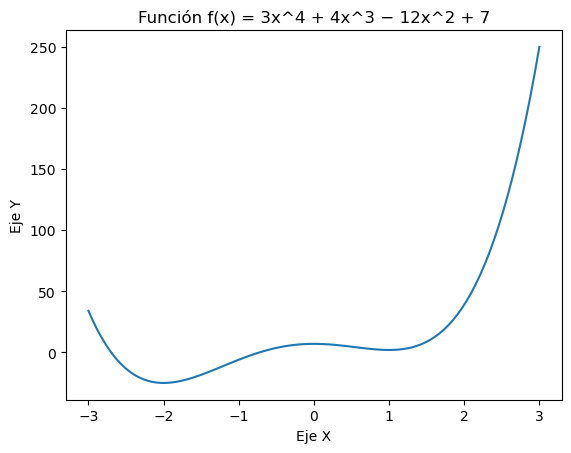

In [145]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 3*(x)**4 + 4*(x)**3 - 12*(x)**2 + 7

x = np.linspace(-3, 3,100)
y = f(x)
plt.plot(x, y)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función f(x) = 3x^4 + 4x^3 − 12x^2 + 7')
plt.show()

In [146]:
def f(x):
    return 3*(x[0])**4 + 4*(x[0])**3 - 12*(x[0])**2 + 7

**I [0.5 puntos] Aplica el método sobre f(x) con x0 = 3 γ = 0.001, tol=1e-12,maxit=1e5.**

In [147]:
x0=[3.0]
ratio=0.001
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [0.9999995]
Número de iteraciones 633


**II [0.5 puntos] Aplica de nuevo el método sobre f(x) con x0 = 3, γ = 0.01,tol=1e-12, maxit=1e5.**

In [148]:
x0=[3.0]
ratio=0.01
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [-2.0000005]
Número de iteraciones 99999


**III [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje γ?**

**RTA**

Los minimos locales de manera analitica de la f(x) = 3x^4 + 4x^3 − 12x^2 + 7:

- Primera derivada f'(x) = 12x^3 + 12x^2 - 24x
- f'(x) = 0, podemos factorizar f'(x): 
            f'(x) = 12x(x^2 + x - 2) = 0 
            12x = 0 --> x = 0
            x^2 + x - 2 = 0 -->(x + 2) (x - 1) = 0  --> x+2=0   x-1=0  --> x= -2   y x=1
- Segunda derivada de f(x): f''(x) = 36x^2 + 24x - 24
- se evalua f''(0), f''(-2), y f''(1):
    f''(0) = -24 < 0, lo que significa que x = 0 corresponde a un máximo local. 
    f''(-2) = 72 > 0, lo que significa que x = -2 corresponde a un mínimo local. 
    f''(1) = 36 > 0, lo que significa que x = 1 corresponde a un mínimo local.
- Los valores de x que corresponden a mínimos locales son x = -2 y x = 1.

| Descenso_grad con ratio= 0,001 |Descenso_grad con ratio= 0,01 | Cálculo analitico |
| --- | --- | --- |
| 0,9999 | -2,0000 | -2 y 1 |

*Interpretación:*

- El algoritmo realizado encuentra los minimos locales de la función de acuerdo con el cálculo analitico realizado
- En cuanto a la tasa de aprendizaje (ratio) determina la cantidad de iteraciones requeridas para que el algoritmo del gradiente descendente alcance el valor mínimo

**IV [0.5 puntos] Aplica nuevamente el método sobre f(x) con x0 = 3, γ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.**

In [149]:
x0=[3.0]
ratio=0.1
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8924\4068517693.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 3*(x[0])**4 + 4*(x[0])**3 - 12*(x[0])**2 + 7
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8924\4068517693.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return 3*(x[0])**4 + 4*(x[0])**3 - 12*(x[0])**2 + 7


x minimo [nan]
Número de iteraciones 99999


*Interpretación:*


**V [0.5 puntos] Finalmente, aplica el método sobre f(x) con x0 = 0, γ = 0.001, tol=1e-12, maxit=1e5. Interpreta el resultado y compáralo con el estudio analítico de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?**

In [150]:
x0=[0.0]
ratio=0.001
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [0.9999995]
Número de iteraciones 1295


*Interpretación:*

El resultado obtenido por el método de descenso gradiente es muy cercano a uno de los mínimos locales como se observaron de manera analitica (x=1 y x=-2). Sin embargo, el método no converge exactamente al mínimo (x=-2) debido a la limitación de tol=1e-12, que establece la precisión máxima permitida. Pero se obtiene una buena aproximación, este fenómeno de la aproximación inexacta del mínimo por el método de descenso gradiente se debe a la naturaleza iterativa del método y la precisión finita de las operaciones aritméticas en la computadora.

**c) Sea la función g : R2 → R dada por g(x, y) = x^2 + y^3 + 3xy + 1**

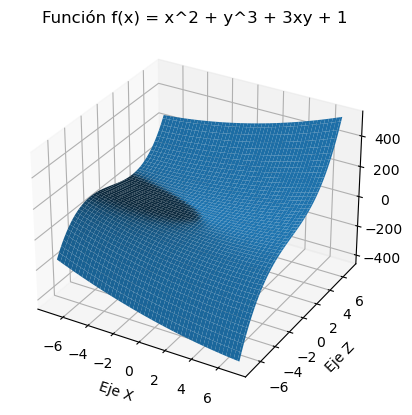

In [151]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return (x)**2 + (y)**3 + 3*(x*y) + 1

x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

g = f(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.ylabel('Eje Z')
plt.title('Función f(x) = x^2 + y^3 + 3xy + 1')
plt.show()

**I [0.5 puntos] Aplíquese el método sobre g(x, y) con x0 = (−1, 1), γ = 0.01, tol=1e-12, maxit=1e5.**

In [152]:
def f(x):
    return (x[0])**2 + (x[1])**3 + 3*(x[0]*x[1]) + 1

In [153]:
x0=[-1.0,1.0]
ratio=0.001
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [-2.2499995   1.49999933]
Número de iteraciones 23484


**II [0.5 puntos] ¿Qué ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultado deseable?**

In [154]:
x0=[0.0,0.0]
ratio=0.001
tol=1e-12
maxit=100000

[x_min,i] = descenso_grad(grad_f, x0, ratio, tol, maxit)
print("x minimo",x_min)
print("Número de iteraciones",i)

x minimo [-2.2499995   1.49999933]
Número de iteraciones 30621


*Interpretación:*

El resultado obtenido por el método de descenso gradiente es muy cercano a uno de los mínimos locales como se observaron de manera analitica en el punto siguiente (x=-2.25 y y=1.5). Se obtiene una buena aproximación si se redondea el resultado a dos cifras, este fenómeno de la aproximación inexacta del mínimo por el método de descenso gradiente se debe a la naturaleza iterativa del método y la precisión finita de las operaciones aritméticas en la computadora.

Cuando se inicia en el punto (0,0) se obtiene el resultado deseado en más iteraciones que en el caso de iniciar en un punto diferente.

**[0.5 puntos] Realícese el estudio analítico de la función y utilícese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.**

**RTA**

Los minimos locales de manera analitica de la g(x, y) = x^2 + y^3 + 3xy + 1:

- Primera derivada -- gradiente de la función g(x, y) es: ∇g(x, y) = [∂g/∂x, ∂g/∂y] = [2x + 3y, 3y^2 + 3x]
- Para encontrar los puntos críticos, resolvemos la siguiente ecuación:
                            2x + 3y = 0 Ec.1
                            3y^2 + 3x = 0 Ec.2
    
    De Ec1. se despeja x en términos de y: x = -(3/2)y 
    Este resultado se sustituye en la segunda ecuación: 3y^2 - (9/2)y = 0
    Factorizando: 3y(y - (3/2)) = 0
        3y = 0  ---> y = 0
        y-(3/2) = 0 ---> y = 3/2
    los puntos críticos son: (0,0) y (-9/4,3/2).

- Para determinar si estos puntos son mínimos locales, máximos locales o puntos de silla, podemos utilizar la matriz Hessiana    de la función g(x, y):
    
    Hg(x, y) = [∂²g/∂x², ∂²g/∂x∂y;
                ∂²g/∂y∂x, ∂²g/∂y²] 
                
                = [2, 3; 
                   3, 6y]   Determinante 12y - 9

- Para evaluar la matriz Hessiana en los puntos críticos, tenemos:

    Hg(0,0) = [2, 3; 
              3, 0]
               
    Hg(-9/2,3/2) = [2, 3; 
                    3, 9]

    En el punto (0,0), la matriz Hessiana tiene un determinante negativo -9, por lo que es un punto de silla.
    En el punto (-9/4,3/2), la matriz Hessiana tiene un determinante positivo 9 y ambos valores propios son positivos, lo que indicaque es un mínimo local.

- el mínimo local de la función g(x, y) es g(-9/4,3/2) = -0.6875

| Descenso_grad con x0=(-1,1) |Descenso_grad con x0=(0,0) | Cálculo analitico |
| --- | --- | --- |
| [-2.2499995   1.49999933] | [-2.2499995   1.49999933] | [-2.25  1.5] |

*Interpretación:*

- El algoritmo realizado encuentra el minimos local de la función de acuerdo con el cálculo analitico realizado
- En cuanto a la tasa de aprendizaje (ratio) determina la cantidad de iteraciones requeridas para que el algoritmo del gradiente descendente alcance el valor mínimo.

In [155]:
print(f([-9/4,3/2]))

-0.6875
